<h1 style="text-align:center;">Introdução à Otimização &ndash; Professor Amit Bhaya &ndash; 2023/2</h1>
<h2 style="text-align:center;">Lista 1</h2>
<h2 style="text-align:center;">Entrega: 04 de setembro de 2023

In [2]:
# Importando as bibliotecas
import Pkg
Pkg.add("Clp")
Pkg.add("JuMP")
Pkg.add("Plots")
@time using Clp
@time using JuMP
@time using Plots

   Resolving package versions...
  No Changes to `C:\Users\Lucas\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Lucas\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Lucas\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Lucas\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Lucas\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Lucas\.julia\environments\v1.9\Manifest.toml`


  0.000912 seconds (309 allocations: 21.969 KiB)
  0.000932 seconds (309 allocations: 21.969 KiB)
  4.213834 seconds (3.29 M allocations: 189.611 MiB, 2.91% gc time, 3.07% compilation time: 97% of which was recompilation)


In [3]:
versioninfo()

Julia Version 1.9.2
Commit e4ee485e90 (2023-07-05 09:39 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 12 × Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, skylake)
  Threads: 2 on 12 virtual cores


## Problema 1: 

Considere o problema de otimização abaixo:

\begin{align}
& \text{maximize}_{u,v,w} \quad -u + v - w \\
& \text{sujeito a} \quad -5u + 5v + 3w \leq 10 \\
& \qquad 5u - 5v - 3w \leq 10 \\
& \qquad -2u + 2v - w \leq -1 \\
& \qquad \qquad w \leq 3 \\
& \qquad u,v,w \geq 0
\end{align}
 - Resolva o programa linear (PL), utilizando JuMP/Julia.
 - Transforme o PL abaixo à forma padrão $\max {c}^\top {x}$, sujeito a ${Ax}\leq {b}, {x}\geq 0$. Resolva de novo em JuMP, utilizando a forma padrão matricial. Compare as duas soluções obtidas.

### Solução do problem 1:

In [4]:
using JuMP, Clp

m = Model(Clp.Optimizer)
@variable(m, u>=0)
@variable(m, v>=0)
@variable(m, w>=0)
@constraint(m, -5u+5v+3w<=10)
@constraint(m, 5u-5v-3w<=10)
@constraint(m, -2u+2v-w<=-1)
@constraint(m, w<=3)
@objective(m, Max,-u+v-w)
print(m)
optimize!(m)
println()
println("u = ", JuMP.value.(u))
println("v = ", JuMP.value.(v))
println("w = ", JuMP.value.(w))
println("objective = ", JuMP.objective_value(m) )


u = 1.00000000005e10
v = 1.0e10
w = 0.0
objective = -0.5
Coin0506I Presolve 3 (-1) rows, 3 (0) columns and 9 (-1) elements
Clp0006I 0  Obj -0 Primal inf 0.499999 (1) Dual inf 0.999999 (1)
Clp0006I 1  Obj -0.5
Clp0000I Optimal - objective value -0.5
Coin0511I After Postsolve, objective -0.5, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -0.5 - 1 iterations time 0.002, Presolve 0.00


In [40]:
A = [-5 5 3; 5 -5 -3; -2 2 -1; 0 0 1]
b = [10; 10; -1; 3]
c = [-1; 1; -1]

using JuMP, Clp
using LinearAlgebra

m = Model(Clp.Optimizer)
@variable(m, x[1:3] >= 0 )
@constraint(m, A*x .<= b )
@objective(m, Max, dot(c,x) )

optimize!(m)
print(m)

#println(status)
println()
println("u = ", JuMP.value.(x[1]) )
println("v = ", JuMP.value.(x[2]) )
println("w = ", JuMP.value.(x[3]) )
println("objective = ", JuMP.objective_value(m) )

Coin0506I Presolve 3 (-1) rows, 3 (0) columns and 9 (-1) elements
Clp0006I 0  Obj -0 Primal inf 0.499999 (1) Dual inf 0.999999 (1)
Clp0006I 1  Obj -0.5
Clp0000I Optimal - objective value -0.5
Coin0511I After Postsolve, objective -0.5, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -0.5 - 1 iterations time 0.002, Presolve 0.00



u = 1.00000000005e10
v = 1.0e10
w = 0.0
objective = -0.5


## Problema 2: 

Considere o LP
\begin{align}
& \text{minimize}\quad c_1 x_1 + c_2 x_2 + c_3 x_3 \\
& \text{sujeito a}\quad x_1 + x_2 \geq 1 \\
& \qquad x_1 + 2x_2 \leq 3 \\
& \qquad x_1,x_2,x_3 \geq 0
\end{align}
Dê o valor ótimo e o conjunto ótimo para os seguintes valores de $c$: $c=(-1,0,1),c=(0,1,0),c=(0,0,-1)$.

### Solução do problema 2:

In [6]:
A = [-1 -1 0; 1 2 0]
b = [-1; 3]
cs = [[-1; 0; 1],[0; 1; 0],[0; 0; -1]]

using JuMP, Clp
using LinearAlgebra

for c in cs # Fazendo um loop com os três exemplos de c
    m = Model(Clp.Optimizer)
    @variable(m, x[1:3] >= 0 ) # x1, x2, x3
    @constraint(m, A*x .<= b ) 
    @objective(m, Min, dot(c,x) )

    optimize!(m)
    print(m)

    #println(status)
    println(c)
    println("x1 = ", JuMP.value.(x[1]) )
    println("x2 = ", JuMP.value.(x[2]) )
    println("x3 = ", JuMP.value.(x[3]) )
    println("objective = ", JuMP.objective_value(m) )
end

Coin0506I Presolve 0 (-2) rows, 0 (-3) columns and 0 (-4) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value -3
Coin0511I After Postsolve, objective -3, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -3 - 0 iterations time 0.002, Presolve 0.00


[-1, 0, 1]
x1 = 3.0
x2 = 0.0
x3 = 0.0
objective = -3.0


Coin0506I Presolve 0 (-2) rows, 0 (-3) columns and 0 (-4) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 0
Coin0511I After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 0 - 0 iterations time 0.002, Presolve 0.00
[0, 1, 0]
x1 = 3.0
x2 = 0.0
x3 = 0.0
objective = 0.0
Coin0508I Presolve thinks problem is unbounded
Clp3003W Analysis indicates model infeasible or unbounded
Clp0006I 0  Obj 0 Primal inf 0.9999999 (1) Dual inf 0.9999999 (1)
Clp0006I 1  Obj -1e+10
Clp0006I 1  Obj -5e+10
Clp0002I Dual infeasible - objective value -5e+10
Clp0032I DualInfeasible objective -5e+10 - 1 iterations time 0.002


[0, 0, -1]
x1 = 0.0
x2 = 0.0
x3 = 5.0e10
objective = -5.0e10


## Problema 3 (Revisão de álgebra linear):

Escreva as afirmações abaixo na linguagem de matrizes. Exemplo: A afirmação "Toda coluna de $C$ é uma combinação linear das colunas de $B$ pode ser escrita em linguagem matricial como $C = BF$ para alguma matriz $F$. Observações: (i) Você pode supor que todas as matrizes que você utiliza têm as dimensões apropriadas; (ii) pode existir mais de uma resposta correta, basta dar qualquer uma!
- (a) Para cada $i$, linha $i$ de $Z$ é uma combinação linear das linhas $i, \ldots , n$ de $Y$.
- (b) $W$ é obtida a partir da matriz $V$ permutando colunas pares e ímpares adjacentes (i.e., $1$ e $2$, $3$ e $4$, ...)
- (c) Cada coluna de $P$ faz um ângulo agudo com cada coluna de $Q$.
- (d) Cada coluna de $P$ faz um ângulo agudo com cada coluna correspondente de $Q$.
- (e) As primeiras $k$ colunas de $A$ são ortogonais às demais colunas de $A$.

### Solução do problema 3:

(a) $Z_{i,:} = T_{i,:} \cdot F_{i}$
onde $Z_{i,:}$ é a linha $i$ da matriz $Z$, $Y_{i,:}$ é a matriz formada pelas linhas $i$ até $n$ da matriz $Y$, e $F_i$ é um vetor de coeficientes.


(b) Isso pode ser feito usandi uma matriz de permutação $P$: $W = VP$ onde $P$ é uma matriz de permutação que reorganiza as colunas de $V$ como especificado.

(c) Isso significa que o produto escalar entre cada par de colunas de $P$ e $Q$ é positivo: $P^T Q > 0$ onde $P^T$ é a matriz transposta de $P$.

(d) Isso significa que o produto escalar entre cada coluna de $P$ e a coluna correspondente de $Q$ é positivo: $P^T Q > 0$ onde $P^T$ é a matriz transposta de $P$.

(e) Isso significa que as colunas das primeiras $k$ colunas de $A$ são ortogonais (produto escalar é zero) às colunas que vêm após a $k$-ésima coluna:
$A[:,1:k]^T A[:,k+1 :] = 0$
onde $A[:, 1:k]$ representa as primeiras $k$ colunas de $A$, e $A[:, k+1:]$ representa as colunas após a $k$-ésima coluna de $A$.

## Problema 4 (Hiperplanos e semi-espaços):

- (a) Deriva uma fórmula para a distância entre dois hiperplanos paralelos $\{x \in {\mathbb R}^n : a^T x = b_1\}$ e $\{x \in {\mathbb R}^n : a^T x = b_2\}$?
- (b) Dê condições para que o semi-espaço $H_1 = \{x \in {\mathbb R}^n : a_1^T x = b_1\}$ esteja contido em $H_2 = \{x \in {\mathbb R}^n : a_2^T x = b_2\}$, justificando sua resposta.

### Solução do problema 4:


(a) Foi utilizado os seguintes links como estudo da questão: https://www.youtube.com/watch?v=a7Hts6EDw3Ye e http://leg.ufpr.br/~ara/teach/svm/02_fundamentos.html .

$||x_2 - x_1|| = \frac{|b_2 - b_1|}{||a||}$

(b) $a_1 = a_2$ e $b_1 \leq b_2$, porque os hiperplanos tem que ser paralelos. Além disso, os hiperplanos tem que ser iguais ou o hiperplano $H_1$ tem que estar abaixo de $H_2$.


## Problema 5 (Poliédros): 

Quais dos conjuntos $S$ definidos abaixo são poliédros? Se possível, escreva $S$ na forma $S = \{x : Ax \leq b, Cx = d\}$.
- (a) $S = \{y_1 a_1 + y_2 a_2 : -1 \leq y_1 \leq 1, -1 \leq y_2 \leq 1 \}$, sendo $a_1, a_2$ vetores linearmente independentes em ${\mathbb R}^n$.
- (b) $S = \{x \in {\mathbb R}^n : x \geq 0, {\mathbb 1}^T x = 1, \sum_{i=1}^n x_i a_i = b_1, \sum_{i=1}^n x_i a_i^2 = b_2\}$, sendo $a_1, \ldots , a_n \in {\mathbb R}$ e $b_1,b_2 \in {\mathbb R}$.
- (c) $S = \{x \in {\mathbb R}^n : x \geq 0,x^T y \leq 1,~\text{para todo}~y~\text{tal que}~\|y\|_2 = 1 \}$.
- (d) $S = \{x \in {\mathbb R}^n : x \geq 0,x^T y \leq 1,~\text{para todo}~y~\text{tal que}~\|y\|_1 = 1 \}$.

### Solução do problem 5:




Os conjuntos $S$ que são poliedros são b,c e d. Não foi possível escrever o $S$ da (c), porque é um círculo unitário.

(b) S = $\{x: \begin{bmatrix} -I \end{bmatrix} x \leq \begin{bmatrix} \vec{0} \end{bmatrix},\begin{bmatrix}\vec{1}^T \\ \vec{a}^T \\ \vec{(a^2)}^T\end{bmatrix} x = \begin{bmatrix} 1 \\ b_1 \\ b_2 \end{bmatrix}\}$

(d) S = $\{x: \begin{bmatrix} -I \\ I \end{bmatrix} x \leq \begin{bmatrix}\vec{0} \\ \vec{1}\end{bmatrix} \}$

## Problema 6 (Centro de Chebyshev)
Encontre o centro e o raio do maior círculo que possa ser inscrito no poliédro descrito pelas inequações $Ax \leq b$, sendo $x \in {\mathbb R}^2$, $A = \begin{bmatrix} -0.26 & 0.97\\0.42 & -0.91\\0.91 & 0.42\\-0.82 & - 0.57\end{bmatrix}$ e $b = \begin{bmatrix} 5.0\\1.0\\8.0\\-1.5\end{bmatrix}$. O que acontece (à solução encontrada pelo JuMP) se acresecentar a inequação $[1 \quad 0] \leq -3$ às quatro inequações já especificadas (i.e., $Ax\leq b$)? Explique sua resposta.

### Solução do problem 6:

In [41]:
using JuMP
using Clp
using LinearAlgebra

A = [-0.26 0.97; 0.42 -0.91; 0.91 0.42; -0.82 -0.57]
b = [5; 1; 8; -1.5]

m = Model(Clp.Optimizer)
@variable(m, r >= 0) # Raio do círculo
@variable(m, x[1:2]) # Coordenadas do centro do círculo
for i = 1:size(A,1)
    @constraint(m, dot(A[i,:],x) + r*norm(A[i,:]) <= b[i])
end
@objective(m, Max, r) # Maximizando o raio do círculo

optimize!(m)

x1,x2 = JuMP.value.(x)
r = JuMP.objective_value(m)
println("As coordenadas do centro de Chebyshev são: ",[x1, x2])
println("O maior raio possível é: ", r)

As coordenadas do centro de Chebyshev são: [2.8762644746445765, 3.1651832449534725]
O maior raio possível é: 2.6662932476616845
Coin0506I Presolve 4 (0) rows, 3 (0) columns and 12 (0) elements
Clp0006I 0  Obj 0 Primal inf 1.502029 (1) Dual inf 0.9999999 (1)
Clp0006I 3  Obj 0.15306835
Clp0006I 3  Obj 2.0551273e+10 Primal inf 8.151635e+10 (2)
Clp0006I 6  Obj 2.6662932
Clp0000I Optimal - objective value 2.6662932
Clp0032I Optimal objective 2.666293248 - 6 iterations time 0.002


In [8]:
A = [-0.26 0.97; 0.42 -0.91; 0.91 0.42; -0.82 -0.57; 1 0]
b = [5; 1; 8; -1.5; -3]

m = Model(Clp.Optimizer)
@variable(m, r >= 0)  # Raio do círculo
@variable(m, x[1:2]) # Coordenadas do centro do círculo
for i = 1:size(A,1)
    @constraint(m, dot(A[i,:],x) + r*norm(A[i,:]) <= b[i])
end
@objective(m, Max, r)     # Maximizando o raio do círculo

optimize!(m)

x1,x2 = JuMP.value.(x)
r = JuMP.objective_value(m)
println("As coordenadas do centro de Chebyshev são: ",[x1, x2])
println("O maior raio possível é: ", r)

Coin0507I Presolve determined that the problem was infeasible with tolerance of 1e-08
Clp3003W Analysis indicates model infeasible or unbounded
Clp0006I 0  Obj 0 Primal inf 4.5020289 (2) Dual inf 0.9999999 (1)
Clp0006I 3  Obj -0.57785486 Primal inf 0.57785476 (1)
Clp0001I Primal infeasible - objective value -0.57785486
Clp0032I PrimalInfeasible objective -0.5778548563 - 3 iterations time 0.002


LoadError: Primal solution not available

O seguinte texto indica que o poliédro se tornou côncavo: "Analysis indicates model infeasible or unbounded"

## Problema 7 (Geometria de LP)

- (a) Determine se $\bar{x} = (1,1,1,1)$ é vértice do poliédro $P$ definido pelas desigualdades lineares:
$$
\begin{bmatrix} -1 & -6 & 1 & 3\\-1 & -2 & 7 & 1\\0 & 3 & -10 & -1\\-6 & -11 & -2 & 12\\1 & 6 & -1 & -3\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} \leq \begin{bmatrix} -3 \\ 5 \\ -8 \\ -7 \\ 4 \end{bmatrix}
$$
- Se sim, determine um vetor $c$ tal que $\bar{x}$ seja o minmizador único de $c^T x$ sobre $P$.
- (b) mesma pergunta para o poliédro definido pelas desigualdades
$$
\begin{bmatrix} 0 & -5 & -2 & -5\\-7 & -7 & -2 & -2\\-4 & -4 & -7 & -7\\-8 & -3 & -3 & -4\\-4 & -4 & 2 & -2\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} \leq \begin{bmatrix} -12 \\ -17 \\ -22 \\ -18 \\ -8 \end{bmatrix}
$$
e, adicionalmente, a igualdade $8x_1 - 7x_2 - 10x_3 -11x_4 = -20$.

### Solução do problem 7:

(a) $\bar{x} = (1,1,1,1)$ é vértice do poliédro $P$, porque satisfaz 4 das igualdades.

## Problema 8 (Grid elétrico com armazenamento de energia)

A cidade Varre-Sai compra sua energia elétrica da utilidade Ampla que cobre por hora. Se for utilizado menos de 50MWh durante uma determinada hora do dia,  o custo é 100 reais por MWh. Qualquer excedente (além de 50 MWh) durante esta hora custa 400 reais por MWh. A energia máxima que Ampla pode fornecer (em qualquer intervalo de uma hora) é 75 MWh. As tabelas abaixo mostram a demanda diária média hora a hora para a cidade Varre-Sai durante o mes de janeiro.

| Hora do dia (manhã) | 01 | 02 | 03 | 04 | 05 | 06 | 07 | 08 | 09 | 10| 11| 12|
|:-------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Demanda (MWh)       | 43| 40| 36| 36| 35| 38| 41| 46| 49| 48| 47| 47|

| Hora do dia ( tarde )| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23| 24|
|:-------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Demanda (MWh)       | 48| 46| 45| 47| 50| 63| 75| 75| 72| 66| 57| 50|

O prefeito de Varre-Sai está preocupado com o gasto alto na parte da tarde e o risco de blecautes por volta de 19h por conta da demanda média alta (perigosamente) próxima ao limite de 75 MWh estipulado pela Ampla.

Para contornar estes problemas potenciais, o prefeito comprou uma bateria grande com capacidade de armazenamento de 30 MWh. A ideia seria comprar mais energia (do que a demanda na primeira parte do dia, quando energia custa menos), armazenar na bateria e utilizar nos horários de pico mais tarde, quando tanto a demanda como o preço atingem valores altos.
1. Quanto dinheiro a cidade de Varre-Sai poderia economizar graças a bateria? Suponha que a bateria começa o dia completamente descarregada, e que, para maior segurança em relação aos  blecautes, limita-se a 65 MWh a quantidade de eletricidade comprada por hora.
2. Quanto dinheiro seria economizado se a bateria tivesse capacidade infinita?
3. Plote um gráfico que mostra:
     1. a demanda de energia típica (da tabela) versus a hora do dia.
     2. a eletricidade comprada utilizando a estratégia encontrada no item 1 versus a hora do dia (plote ambos os gráficos nos mesmos eixos).

### Solução do problem 8:

Custo sem o uso de bateria: 152400
Custo com o uso de bateria: 143400.0
Economia:                   9000.0

Coin0506I Presolve 21 (-4) rows, 62 (-11) columns and 82 (-15) elements
Clp0006I 0  Obj 69329.993 Primal inf 727.80002 (21)
Clp0006I 31  Obj 137129.99 Primal inf 181.90001 (10)
Clp0006I 48  Obj 143400
Clp0000I Optimal - objective value 143400
Coin0511I After Postsolve, objective 143400, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 143400 - 48 iterations time 0.002, Presolve 0.00


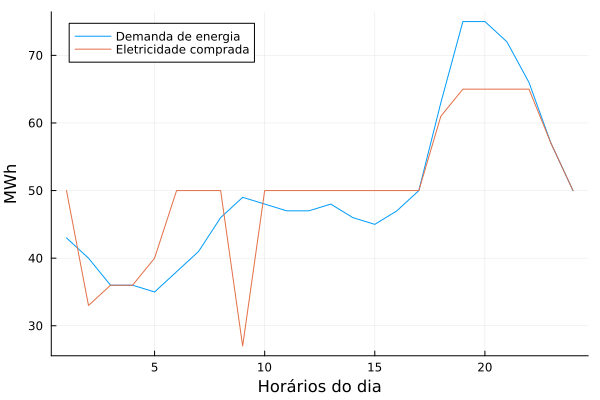

In [46]:
preco = 100 # 100 reais por MWh em menos de 50 MWh
excedente = 400 # 400 reaias por MWh acima de 50MWh
demanda = [43, 40, 36, 36, 35, 38, 41, 46, 49, 48, 47, 47, 48, 46, 45, 47, 50, 63, 75, 75, 72, 66, 57, 50]
lim_bateria = 30 # limite de bateria
custo = 0

for i in demanda
    if i <= 50
        custo += i*preco
    else 
        custo += (i-50)*excedente + 50*preco
    end 
end 

m = Model(Clp.Optimizer)
@variable(m, 0 <= bateria[1:25] <= 30) # carga inicial + 24 horas -> com limite para a carga da bateria de 30MWh
@variable(m, 0 <= compra_normal[1:24] <= 50) # energia comprada no preço normal -> 100 
@variable(m, 0 <= compra_exc[1:24] <= 15) # energia comprada no preço mais caro -> 400 
# A compra de ambas as energias não pode ultrapassar de 65MWh 

@constraint(m, bateria[1] == 0) # A bateria começa o dia sem carga

# Compra-se energia para atingir a demanda e carregar a bateria
@constraint(m, [i in 1:24], compra_normal[i] + compra_exc[i] + bateria[i] == demanda[i] + bateria[i+1]) 

@objective(m, Min, sum(compra_normal*preco) + sum(compra_exc*excedente)) # minimiza o custo total com o uso da bateria  

optimize!(m)
println("Custo sem o uso de bateria: ", custo)
println("Custo com o uso de bateria: ", JuMP.objective_value.(m))
println("Economia:                   ", custo - JuMP.objective_value.(m)) 
println()

t = range(start = 1; stop=24, length=24)
plot(t, [demanda, JuMP.value.(compra_normal) .+ JuMP.value.(compra_exc)], label=["Demanda de energia" "Eletricidade comprada"])
xlabel!("Horários do dia")
ylabel!("MWh")

## Problema 9 (Construção de um estádio esportivo [sob regime de anti-propina!])
Uma cidade pequena deseja construir um estádio (também pequeno). Após licitação, uma empreiteira ganha o contrato e deseja cumprir a tarefa no menor tempo possível. Todas as grandes tarefas estão listadas na tabela abaixo. Algumas podem ser iniciadas apenas quando as tarefas predecessoras tiverem sido concluídas e esta dependência está registrada na quarta coluna.

|Tarefa | Descrição | Duração (em semanas)| Tarefas predecessoras | Redução máxima (em semanas)| Custo da redução (R\$1k/semana) |
|:---:|:----------:|:------------------:|:------------:|:---------------------------:|:---------------------------:|
|1 |Instalação no local de construção |2 | não há | 0 | -- |
| 2| Terraplenagem | 16 | 1 | 3 | 30 |
|3 |Construção da fundação | 9 | 2 | 1 | 26 |
| 4 |Ruas de acesso e outras redes | 8 | 2 | 2 | 12 |
| 5 | Construir o porão | 10 | 3 | 2 | 17 |
| 6 | Piso principal | 6 | 4,5 | 1 | 15 |
| 7 | Divisão do vestiário | 2 | 4 | 1 | 8 |
| 8 | Instalação elétrica nas arquibancadas | 2 | 6 | 0 | -- |
|9  | Construção da cobertura | 9 | 4,6 | 2 | 42 |
|10 | Iluminação do estádio | 5 | 4 | 1 | 21 |
| 11 | Instalações nas arquibancadas | 3 | 6 | 1 |18 |
| 12 | Impermeabilização da cobertura | 2 | 9 | 0 | -- |
| 13 | Acabamento do vestiário | 1 | 7 | 0 | -- |
| 14 | Construção da bilheteria | 7 | 2 | 2 | 22 |
| 15 | Ruas de acesso secundárias | 4 | 4,14 | 2 | 12 |
|16  | Placar e altofalantes |3 | 8,11,14 | 1 | 6 |
|17 | Gramado e acessórios para esportes | 9 | 12 | 3 | 16 |
|18 | Entrega do estádio | 1 | 17 | 0 | -- |

As perguntas que a empreiteira quer que sejam respondidas são as seguintes:
1. Qual a data mais cedo para o término da construção? Note que as últimas duas colunas não são  relevantes para este item. 
2. Para algumas tarefas a empreiteira pode contratar operários extra e alugar mais equipamento para reduzir o tempo total. As últimas duas colunas mostram o número máximo de semanas poupadas por tarefa e o custo adicional associado por semana, por conta do trabalho extra. Plote um gráfico de compromisso ("tradeoff") mostrando o custo extra em função do número de semanas poupadas.
3. A prefeitura da cidade gostaria que a obra fosse terminada antes da data combinada e anunciada (resposta do item  1). Como incentivo, a prefeitura propõe pagar um bônus de R\$30k por cada semana de antecipação da data de término da obra. Quando terminará o projeto se a empreiteira deseja maximizar seu lucro?

### Solução do problem 9:

In [9]:
# 1. Definindo a data mais cedo para o término da construção
tasks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18] # Tarefas
println("Número de tarefas = ",length(tasks))
println(tasks)

dur = [2,16,9,8,10,6,2,2,9,5,3,2,1,7,4,3,9,1] # Duração das tarefas
duration = Dict(zip(tasks,dur))
println("Número de durações = ",length(dur))

# Tarefas predecessoras
pre = ( [], [1], [2], [2], [3], [4,5], [4], [6], [4,6], [4], [6], [9], [7], [2], [4,14], [8,11,14], [12], [17] )
println("Tamanho da lista de predecessoras = ", length(pre))
pred = Dict(zip(tasks,pre));
println(pred)

using JuMP,Clp
m = Model(Clp.Optimizer)

@variable(m, tstart[tasks])

# Uma linha de implementação dos limites
#@constraint(m, link[i in tasks, j in pred[i]], tstart[i] >= tstart[j] + duration[j])

for i in tasks
    for j in pred[i]
        @constraint(m, tstart[i] >= tstart[j] + duration[j])
    end
end
@constraint(m, tstart[1] == 0)
@objective(m, Min, tstart[18] + duration[18])     # Começo da última tarefa mais a duração dela

optimize!(m)
println(JuMP.value.(tstart))
println("minimum duration: ", JuMP.objective_value(m))

Number of tasks = 18
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Number of durations = 18
Length of predecessor list = 18
Dict{Int64, Vector}(5 => [3], 16 => [8, 11, 14], 7 => [4], 12 => [9], 8 => [6], 17 => [12], 1 => Any[], 4 => [2], 6 => [4, 5], 13 => [7], 2 => [1], 10 => [4], 11 => [6], 9 => [4, 6], 15 => [4, 14], 18 => [17], 14 => [2], 3 => [2])


[0, 90, 116, 140, 174, 189, 197, 197, 281, 302, 320, 320, 320, 364, 388, 394, 442, 442]


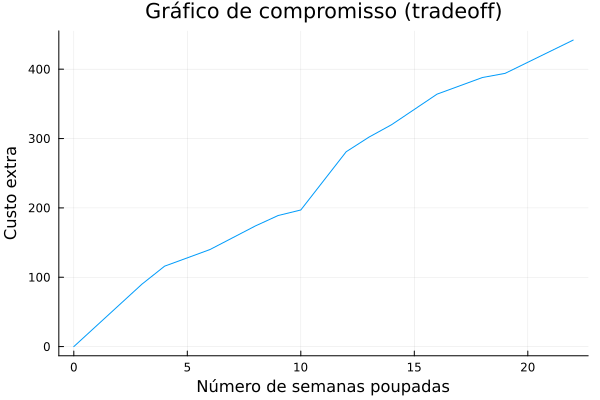

In [49]:
# 2. Plotando o gráfico de compromisso
using Plots

red_max = [0,3,1,2,2,1,1,0,2,1,1,0,0,2,2,1,3,0] # x -> em semanas
custo_red = [0,30,26,12,17,15,8,0,42,21,18,0,0,22,12,6,16,0] # y -> R$1k/semana 
 
custo = custo_red.*red_max 
custo = [sum(custo[1:i]) for i in 1:18] # custo cumulativo ao longo do tempo
red_max = [sum(red_max[1:i]) for i in 1:18] 

println(custo)

plot(red_max,custo, label="")
title!("Gráfico de compromisso (tradeoff)")
xlabel!("Número de semanas poupadas")
ylabel!("Custo extra")

In [47]:
# 3. Maximização do lucro
tasks = []
for i = 1:18
    push!(tasks, string(i))  
end

dur = [2, 16, 9, 8, 10, 6, 2, 2, 9, 5, 3, 2, 1, 7, 4, 3, 9, 1]
red_max = [0,3,1,2,2,1,1,0,2,1,1,0,0,2,2,1,3,0] # x -> em semanas
custo_red = [0,30,26,12,17,15,8,0,42,21,18,0,0,22,12,6,16,0] # y -> R$1k/semana 

pre = ( [], ["1"], ["2"], ["2"], ["3"], ["4","5"], ["4"], ["6"], ["4","6"], ["4"], ["6"], ["9"],
    ["7"], ["2"], ["4","14"], ["8","11","14"], ["12"], ["17"])

pred = Dict(zip(tasks,pre)); 

m = Model(Clp.Optimizer)

@variable(m, t_start[tasks])

@constraint(m, t_start["1"] == 0)

for i in 1:18
    if custo_red[i] <= 30
        dur[i] = dur[i]-red_max[i]
    else
        dur[i] = dur[i]
    end
end

duration = Dict(zip(tasks,dur))

@constraint(m, [i in tasks, j in pred[i]], t_start[i] >= t_start[j] + duration[j])

@objective(m, Min, t_start["18"] + duration["18"]) # Começo da última tarefa mais a duração dela

optimize!(m)
println(JuMP.value.(t_start)) # Começo de cada tarefa
println()
println("Total de semanas depois da redução: ", JuMP.objective_value(m))
println("Lucro ao reduzir o número de semanas: ", 30*(64-JuMP.objective_value(m)), "k")

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, Any["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18"]
And data, a 18-element Vector{Float64}:
  0.0
  2.0
 15.0
 15.0
 23.0
 31.0
 21.0
 36.0
 36.0
 21.0
 36.0
 45.0
 22.0
 15.0
 21.0
 38.0
 47.0
 53.0

Total de semanas depois da redução: 54.0
Lucro ao reduzir o número de semanas: 300.0k
Coin0506I Presolve 0 (-23) rows, 0 (-18) columns and 0 (-45) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 54
Coin0511I After Postsolve, objective 54, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 54 - 0 iterations time 0.002, Presolve 0.00


## Problema 10: (Clássico: dieta ótima)

Suponha que uma certa dieta alimentar esteja baseada nos alimentos (em parêntesis vemos as unidades utilizadas): 
leite desnatado (litro) , carne magra de boi (Kg), carne de frango (kg) e batata doce (100 g). 
Sabendo-se que os requisitos nutricionais serão expressos em termos de vitaminas A,C, e D e controlados por 
suas quantidades mínimas (em miligramas), uma vez que são indispensáveis à preservação da saúde da pessoa 
que estará se submetendo a dieta. A Tabela abaixo resume a quantidade de cada vitamina em disponibilidade 
**em cada unidade considerada dos alimentos**, sua necessidade diária para a boa saúde de uma pessoa e o custo 
(em reais) de cada unidade do alimento considerado. Modele e resolva o problema de forma a minimizar os gastos com a 
compra dos alimentos, obedecendo às quantidades mínimas recomendadas em relação às vitaminas.

Tabela: Dados do problema da dieta

|Alim.$\rightarrow$|leite | carne |frango | batata | Qtd. Mín. |
|------------------|------|-------|-------|--------|-----------|
|Vit.$\downarrow$ |  
|A |2 |2 |5 |4 |11 |
|C |50 | 20 | 10 | 45| 70 |
|D |80 |70 |10 |60 |250|
| |
|Custo $\rightarrow$ |5 |40 |20 |2 |




### Solução do problem 10:

In [37]:
A = [2 2 5 4;50 20 10 45;80 70 10 60]
b = [11; 70; 250]
c = [5; 40; 20; 2]

using JuMP, Clp
using LinearAlgebra

m = Model(Clp.Optimizer)
@variable(m, x[1:4] >= 0 )      # Declarando as variáveis dos alimentos x[1] = leite, x[2] = carne, x[3] = frango, x[4] = batata
@constraint(m, A*x .>= b )      # Usando o formato padrão com algumas alterações
@objective(m, Min, dot(c,x) )   # Determinando o objetivo que é minimizar os gastos com compra de alimentos

optimize!(m)
print(m)

println()
println("Qtd de leite (em litros) = ", JuMP.value.(x[1]) )
println("Qtd de carne  (em kg)= ", JuMP.value.(x[2]) )
println("Qtd de frango (em kg) = ", JuMP.value.(x[3]) )
println("Qtd de batata (em 100g) = ", JuMP.value.(x[4]) )
println("Gasto mínimo com alimentos = ", JuMP.objective_value(m) )

Coin0506I Presolve 3 (0) rows, 4 (0) columns and 12 (0) elements
Clp0006I 0  Obj 0 Primal inf 6.7249997 (3)
Clp0006I 1  Obj 8.3333333
Clp0000I Optimal - objective value 8.3333333
Clp0032I Optimal objective 8.333333333 - 1 iterations time 0.002



Qtd de leite (em litros) = 0.0
Qtd de carne  (em kg)= 0.0
Qtd de frango (em kg) = 0.0
Qtd de batata (em 100g) = 4.166666666666666
Gasto mínimo com alimentos = 8.333333333333332
